# Short Tutorial on Resampling Methods

We'll first go over bootstrapping, taking a classic example from the Efron and Tibshirani book, "An Introduction to the Bootstrap". This example has been adapted from an excellent series of lectures that goes in depth with the theory and application of resampling methods and much much more: http://www.cns.nyu.edu/~eero/math-tools/.

__Research question__: Does taking aspirin reduce your risk of heart attack? These are data from a famous study done back in the 80s.

In [54]:
# Since this is Python, we first have to import our libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [61]:
# Let's create our data
num_aspirin = 11037 # total number of participants taking aspirin
num_aspirin_ha = 104 # number of aspirin takers who ended up having a heart attack
num_placebo = 11034 # total number of participants on a placebo
num_placebo_ha = 189 #number of placebo takers who had a heart attack
empirical_ratio = (num_aspirin_ha/num_aspirin)/(num_placebo_ha/num_placebo) #experimentally observed ratio of HAs in Aspirin vs Placebo groups (i.e., Experimental Results)
num_samples = 100000 # number of times to resample (you can play around with this value and see how stable your estimates are)
ratio = np.zeros((num_samples,1)) # initialize and preallocate (makes code run faster)

In [56]:
# Let's define our groups
A1 = np.ones((num_aspirin_ha,1)) # we code those who had a heart attack with a 1
A2 = np.zeros((num_aspirin - num_aspirin_ha,1)) # aspirin takers who did not have a heart attack
P1 = np.ones((num_placebo_ha,1)) # same for placebo
P2 = np.zeros((num_placebo - num_placebo_ha,1)) # same 

In [57]:
# Stack your vectors of aspirin and placebo groups
A = np.concatenate([A1,A2]) 
P = np.concatenate([P1,P2])

Here is where the magic takes place. We're going to simulate the same experiment a total of num_samples times by randomly resampling with replacement, thereby creating the distribution of sample means (Question: Do we expect a normal distribution? Why or why not?)

In [63]:
for sample in np.arange(num_samples):
    
    indices_A = np.random.randint(num_aspirin, size=num_aspirin)
    indices_P = np.random.randint(num_placebo, size=num_placebo)
    ratio[sample] = np.sum(A[indices_A])/np.sum(P[indices_P])
       

Now that we have a bootstrapped distribution, let's calculate 95% CIs.

In [99]:
# First step: sort values
lb_pctl = 2.5 # define percentile boundaries
ub_pctl = 97.5
sorted_ratio = np.sort(ratio, axis=None)
lb_idx = int(np.round(num_samples/100*lb_pctl))
ub_idx = int(np.round(num_samples/100*ub_pctl))
lb = sorted_ratio[lb_idx]
ub = sorted_ratio[ub_idx]

Text(0.5,1,'Bootstrapped distribution of HA ratios (Aspirin/Placebo)')

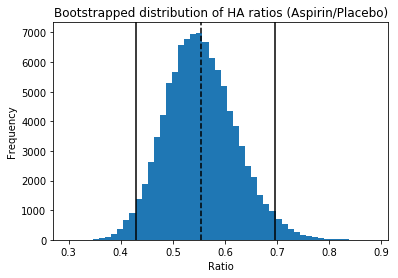

In [111]:
# Plot histogram
num_bins = 50
plt.hist(ratio, num_bins)
plt.axvline(x=lb, color='black')
plt.axvline(x=ub, color='black')
plt.axvline(x=np.mean(ratio), color='black', linestyle='--')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Bootstrapped distribution of HA ratios (Aspirin/Placebo)')


What are other times you would use bootstrapping? It's great for estimating CIs because it makes no assumptions about the distribution of the data (ie, you can get reliable bootstrapped CIs for all types of distributions--skewed, uniform, whatever). Why? think Central Limit Theorem. You can apply this idea to statistical tests as well,
especially when your data are non-normally distributed. We'll next go over non-parametric permutation tests, which won't seem as abstract now that you understand the basic idea of resampling.